<a href="https://colab.research.google.com/github/AsyrafNurA/slp_scratch_iris_classifier/blob/main/SLP_scratch_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Learning: Implementing Single Layer Perceptron Classification Model for Iris Dataset**

By:

Asyraf Nur Ardliansyah

22/497649/PA/21439

Notes:

To ensure that the code can be read easier, I've given necessary comments in almost every code blocks, so that the readers could understand about what happens in that corresponding line/area.

# Model's Function Defining

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Sum of Multiplication or Feedforward
def result(x1, t1, x2, t2, x3, t3, x4, t4, bias):
  return x1*t1 + x2*t2 + x3*t3 + x4*t4 + bias

In [ ]:
# Sigmoid Function
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
# Prediction
def predict(x, threshold):
  return 1 if x >= threshold else 0

In [ ]:
# Error
def error(act, target):
  return (act - target)

In [ ]:
# Values Change

# dt1
def count_dt1(x1, act, class_fact):
  return 2 * (act - class_fact) * (1 - act) * act * x1

# dt2
def count_dt2(x2, act, class_fact):
  return 2 * (act - class_fact) * (1 - act) * act * x2

# dt3
def count_dt3(x3, act, class_fact):
  return 2 * (act - class_fact) * (1 - act) * act * x3

# dt4
def count_dt4(x4, act, class_fact):
  return 2 * (act - class_fact) * (1 - act) * act * x4

# db
def count_db(act, class_fact):
  return 2 * (act - class_fact) * (1 - act) * act

In [ ]:
# Update Function

# t1
def update_t1(t1, dt1, learn_rate):
  return t1 - learn_rate*dt1

# t2
def update_t2(t2, dt2, learn_rate):
  return t2 - learn_rate*dt2

# t3
def update_t3(t3, dt3, learn_rate):
  return t3 - learn_rate*dt3

# t4
def update_t4(t4, dt4, learn_rate):
  return t4 - learn_rate*dt4

# bias
def update_bias(bias, db, learn_rate):
  return bias - learn_rate*db

In [ ]:
# Object Classifier
def classify(x1, t1, x2, t2, x3, t3, x4, t4, bias, class_fact, learn_rate, threshold):

  # Getting Sum of Multiplication
  som = result(x1, t1, x2, t2, x3, t3, x4, t4, bias)

  # Activation
  act = round(sigmoid(som), 10)

  # Class Prediction
  class_prediction = predict(act, threshold)

  # Error
  err = error(act, class_fact)

  # Is it correct or not
  correct = 1 if class_prediction == class_fact else 0

  # Notes: Round function is used in order to makes the model's values could be as same as those in the spreadsheets
  # Updating the weights
  t1 = round(update_t1(t1, count_dt1(x1, act, class_fact), learn_rate), 10)
  t2 = round(update_t2(t2, count_dt2(x2, act, class_fact), learn_rate), 10)
  t3 = round(update_t3(t3, count_dt3(x3, act, class_fact), learn_rate), 10)
  t4 = round(update_t4(t4, count_dt4(x4, act, class_fact), learn_rate), 10)
  bias = round(update_bias(bias, count_db(act, class_fact), learn_rate), 10)

  return t1, t2, t3, t4, bias, correct, err

In [ ]:
# Isn't be used. Just for testing in when making the epoch function

# Batch Classification
def batch_classification(batch, init_t, learn_rate, threshold):
  t1, t2, t3, t4, bias = init_t["t1"], init_t["t2"], init_t["t3"], init_t["t4"], init_t["bias"]

  for i in range(batch.shape[0]):
    x1, x2, x3, x4, class_fact = batch.iloc[i, 0], batch.iloc[i, 1], batch.iloc[i, 2], batch.iloc[i, 3], batch.iloc[i, 5]

    t1, t2, t3, t4, bias, correct, err = classify(x1, t1, x2, t2, x3, t3, x4, t4, bias, class_fact, learn_rate, threshold)

  return t1, t2, t3, t4, bias

In [ ]:
# Epoch Function
def epoch(batch, init_t, learn_rate, threshold, epochs):

  # Assigning values
  t1, t2, t3, t4, bias = init_t["t1"], init_t["t2"], init_t["t3"], init_t["t4"], init_t["bias"]

  # List for storing informations from each epoch
  epochs_acc = []

  epochs_mse = []

  # Epochs
  for i in range(epochs):

    # List and variable for storing informations from each batch
    current_tp = 0

    current_err = []

    # Batch
    for j in range(batch.shape[0]):

      # Assigning values
      x1, x2, x3, x4, class_fact = batch.iloc[j, 0], batch.iloc[j, 1], batch.iloc[j, 2], batch.iloc[j, 3], batch.iloc[j, 5]

      # Classification and update all weights
      t1, t2, t3, t4, bias, correct, err = classify(x1, t1, x2, t2, x3, t3, x4, t4, bias, class_fact, learn_rate, threshold)

      # True Positive
      if correct == 1:
        current_tp += 1

      # Error
      current_err.append(err)

    # MSE
    current_mse = (sum(map(lambda x: x**2, current_err)) / len(current_err))

    # Storing the informations into corresponding list
    epochs_mse.append(current_mse)

    epochs_acc.append(current_tp / batch.shape[0])

  return t1, t2, t3, t4, bias, epochs_acc, epochs_mse

# Data Preprocessing

In [ ]:
# Data Splitting
def split(df, ratio):
  train = df.iloc[:int(ratio * df.shape[0])]
  test = df.drop(train.index)

  return train, test

# Model Testing

Make sure that the algorithm could goes well.

In [ ]:
# Test Algorithm

# test_object = {
#     "x1": 5.1,
#     "x2": 3.5,
#     "x3": 1.4,
#     "x4": 0.2,
#     "class": 0
# }

# init_t = {
#     "t1": 0.5,
#     "t2": 0.8,
#     "t3": 0.7,
#     "t4": 0.3,
#     "bias": 0.5
# }

# learn_rate = 0.1
# threshold = 0.5

# t1, t2, t3, t4, bias = classify(test_object["x1"], init_t["t1"], test_object["x2"], init_t["t2"], test_object["x3"], init_t["t3"], test_object["x4"], init_t["t4"], init_t["bias"], test_object["class"], learn_rate, threshold)

# print(t1, t2, t3, t4, bias)

# Load the Dataset and Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Training Dataset
train = pd.read_csv('/content/drive/MyDrive/Semester 5/Deep Learning/iris_deep-learning.csv')
train['code'] = train['class_name'].map({'Iris-setosa': 0, 'Iris-virginica': 1})

train

,sepal_length,sepal_width,petal_length,petal_width,class_name,code
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
75,7.7,3.0,6.1,2.3,Iris-virginica,1
76,6.3,3.4,5.6,2.4,Iris-virginica,1
77,6.4,3.1,5.5,1.8,Iris-virginica,1
78,6.0,3.0,4.8,1.8,Iris-virginica,1


# Model Training

In [ ]:
# Initiate the weights
init_t = {
    "t1": 0.5,
    "t2": 0.8,
    "t3": 0.7,
    "t4": 0.3,
    "bias": 0.5
}

# Learn Rate
learn_rate = 0.1

# Threshold
threshold = 0.5

# Training with 10 Epochs
t1, t2, t3, t4, bias, epochs_acc, epochs_mse = epoch(train, init_t, learn_rate, threshold, 10)

# Show the Informations
print(f"Final weights:\nt1: {t1}\nt2: {t2}\nt3: {t3}\nt4: {t4}\nbias: {bias}\n")
print(f"epochs_acc: {epochs_acc}\nepochs_mse: {epochs_mse}")

Final weights:
t1: -0.7075568648
t2: -0.3706654382
t3: 1.4050876874
t4: 0.7692673422
bias: 0.1732105155

epochs_acc: [0.5, 0.5, 0.525, 0.975, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
epochs_mse: [0.49857542322096143, 0.49745622222844543, 0.4577094639560709, 0.020892050526482582, 0.011211059631918121, 0.007659751718115686, 0.005848660208352867, 0.0046199904744965384, 0.003739272272308479, 0.0030913121425723894]


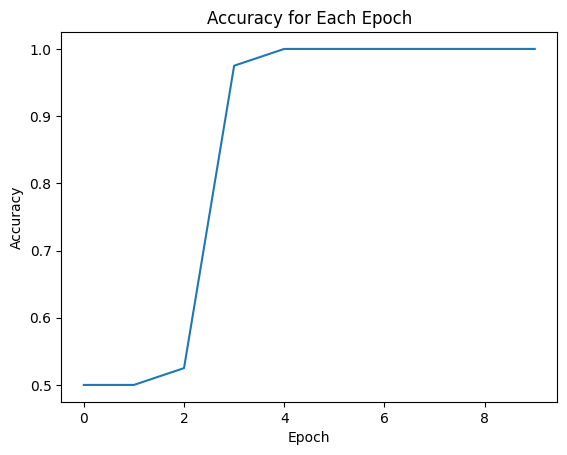

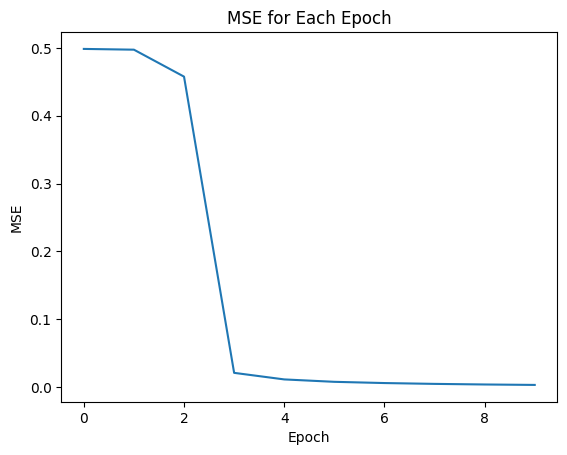

In [ ]:
# Plotting the Accuracy for Each Epoch
plt.plot(epochs_acc)
plt.title('Accuracy for Each Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plotting the MSE for Each Epoch
plt.plot(epochs_mse)
plt.title('MSE for Each Epoch')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()